In [56]:
import numpy as np
from NN import *
from activations import *
import matplotlib.pyplot as plt

# Perceptron learning

In [22]:
class Perceptron_learning:
    def __init__(self, neuron):
        self.neuron = neuron
    
    def fit(self, x_train, y_train, c, epochs):
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        loss_per_epoc = []
        weights_per_epoch = []
        bias_per_epoch = []
        history = {}

        for i in range(1, epochs+1):
            err_per_sample = []
            weights_per_sample = []
            bias_per_sample = []
            for x, y in zip(x_train, y_train):
                err = self.partial_fit(x, y, c)
                err_per_sample.append(err)
                weights_per_sample.append(self.neuron.weights)
                bias_per_sample.append(self.neuron.b)
            
            loss_per_epoc.append(err_per_sample)
            weights_per_epoch.append(weights_per_sample)
            bias_per_epoch.append(bias_per_sample)
            print(f"Weights after EPOCH {i} are w={self.neuron.weights}, b={self.neuron.b}")
            print(f"Loss per sample {err_per_sample}")
        
        history["loss"] = loss_per_epoc
        history["weights"] = weights_per_epoch
        history["bias"] = bias_per_epoch
        return history
    
    def partial_fit(self, x, y, c):
        x = np.array(x)
        output = self.predict(x)
        err = c*(y-output)
        self.neuron.weights += c*err*x
        self.neuron.b += c*err
        return err
    
    def predict(self, x):
        return self.neuron.get_output(x)

# Example 1

In [23]:
x_train = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_train = [-1, -1, -1, 1]

n = Neuron(2, [1, 1], sign, b=1)

model = Perceptron_learning(n)
r = model.fit(x_train, y_train, 1, 3)

Weights after EPOCH 1 are w=[3. 3.], b=-1
Loss per sample [0, -2, -2, 2]
Weights after EPOCH 2 are w=[3. 3.], b=-1
Loss per sample [0, 0, 0, 0]
Weights after EPOCH 3 are w=[3. 3.], b=-1
Loss per sample [0, 0, 0, 0]


In [24]:
for i in x_train:
    print(i, model.predict(i))

[-1, -1] -1
[-1, 1] -1
[1, -1] -1
[1, 1] 1


# Example 2

In [26]:
x_train = [[-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1], [1,-1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1] ]
y_train = [1, 1, 1, 1, 1, 1, 1, -1]

n = Neuron(3, [1, 1, 1], sign, b=1)

model = Perceptron_learning(n)
r = model.fit(x_train, y_train, 1, 3)

Weights after EPOCH 1 are w=[-3. -3. -3.], b=1
Loss per sample [2, 0, 0, 0, 0, 0, 0, -2]
Weights after EPOCH 2 are w=[-3. -3. -3.], b=5
Loss per sample [0, 0, 0, 2, 0, 2, 2, -2]
Weights after EPOCH 3 are w=[-3. -3. -3.], b=5
Loss per sample [0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
for x in x_train:
    print(x, model.predict(x))

[-1, -1, -1] 1
[-1, -1, 1] 1
[-1, 1, -1] 1
[-1, 1, 1] 1
[1, -1, -1] 1
[1, -1, 1] 1
[1, 1, -1] 1
[1, 1, 1] -1


# Hebbian Learning Rule

In [55]:
class Hebian_learning:
    def __init__(self, neuron, with_bias=True):
        self.neuron = neuron
        self.with_bias = with_bias
    
    def fit(self, x_train, c, epochs):
        x_train = np.array(x_train)
        weights_history = []
        bias_per_epoch = []
        history = {}

        for i in range(1, epochs+1):
            bias_per_sample = []
            for x in x_train:
                err = self.partial_fit(x, c)
                weights_history.append(self.neuron.weights)
                bias_per_sample.append(self.neuron.b)
                print(f"Weights after epoch {i} are w={self.neuron.weights}, b={self.neuron.b}")
            
            bias_per_epoch.append(bias_per_sample)
            
        
        history["weights"] = weights_history
        history["bias"] = bias_per_epoch
        return history
    
    def partial_fit(self, x, c):
        x = np.array(x)
        output = self.predict(x)
        ls = c*output
        self.neuron.weights += c*ls*x
        
        if self.with_bias:
            self.neuron.b += c*ls
        return ls
    0.
    def predict(self, x):
        return self.neuron.get_output(x)

In [47]:
x_train = [[1, -2, 1.5, 0], [1, -0.5, -2, -1.5], [0, 1, -1, 1.5]]
n = Neuron(4, [1, -1, 0, 0.5], bi_threshold(0))

In [48]:
r = Hebian_learning(n, False)

In [49]:
h = r.fit(x_train, 1, 4)

Weights after epoch 1 are w=[ 2.  -3.   1.5  0.5], b=0
Weights after epoch 1 are w=[ 1.  -2.5  3.5  2. ], b=0
Weights after epoch 1 are w=[ 1.  -3.5  4.5  0.5], b=0
Weights after epoch 2 are w=[ 2.  -5.5  6.   0.5], b=0
Weights after epoch 2 are w=[ 1. -5.  8.  2.], b=0
Weights after epoch 2 are w=[ 1.  -6.   9.   0.5], b=0
Weights after epoch 3 are w=[ 2.  -8.  10.5  0.5], b=0
Weights after epoch 3 are w=[ 1.  -7.5 12.5  2. ], b=0
Weights after epoch 3 are w=[ 1.  -8.5 13.5  0.5], b=0
Weights after epoch 4 are w=[  2.  -10.5  15.    0.5], b=0
Weights after epoch 4 are w=[  1. -10.  17.   2.], b=0
Weights after epoch 4 are w=[  1.  -11.   18.    0.5], b=0


In [50]:
for i in x_train:
    res = r.predict(i)
    print(res)

1
-1
-1


In [51]:
x_train = [[0, 0], [0, 1], [1, 0], [1, 1]]

# eg2

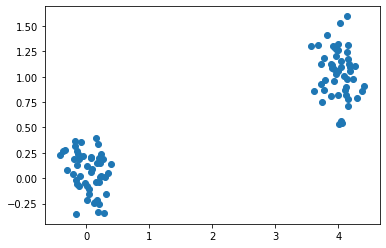

In [77]:
import random
def random_cluster(x0, y0, points, scatter):
    X = []
    Y = []
    for i in range(points):
        X.append(random.gauss(x0, scatter))
        Y.append(random.gauss(y0, scatter))
    
    return (X, Y)

x1, y1 = random_cluster(0, 0, 50, 0.2)
x2, y2 = random_cluster(4,1, 50, 0.2)

s1 = np.column_stack((x1, y1))
s2 = np.column_stack((x2, y2))

x_train = np.row_stack((s1, s2))

plt.scatter(x_train[:, 0], x_train[:, 1])


In [85]:
n = Neuron(2, [1, 3], bi_threshold(0), 0)

In [86]:
model = Hebian_learning(n)

In [87]:
np.random.shuffle(x_train)

In [88]:
r = model.fit(x_train, 1, 10)

Weights after epoch 1 are w=[4.8133817 4.4076414], b=1
Weights after epoch 1 are w=[4.719323 4.42621 ], b=2
Weights after epoch 1 are w=[8.909995  5.4837556], b=3
Weights after epoch 1 are w=[12.804371   6.5683823], b=4
Weights after epoch 1 are w=[16.528578  7.500035], b=5
Weights after epoch 1 are w=[16.662628   7.2622676], b=6
Weights after epoch 1 are w=[16.61759   7.484772], b=7
Weights after epoch 1 are w=[16.465364   7.7561774], b=8
Weights after epoch 1 are w=[16.341938  7.995012], b=9
Weights after epoch 1 are w=[20.56861   8.973037], b=10
Weights after epoch 1 are w=[20.376036  9.159387], b=11
Weights after epoch 1 are w=[20.1727    9.204473], b=12
Weights after epoch 1 are w=[24.137922 10.408219], b=13
Weights after epoch 1 are w=[28.300423 11.536367], b=14
Weights after epoch 1 are w=[32.71374  12.445666], b=15
Weights after epoch 1 are w=[32.561726 12.390111], b=16
Weights after epoch 1 are w=[36.862408 13.179604], b=17
Weights after epoch 1 are w=[37.07316  13.140465], b=